**This was not used**

Initial unused implementation of different salience representation metrics

In [42]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def targets_to_binary(target_matrix):
    binary_matrix = np.zeros(target_matrix.shape)
    binary_matrix[target_matrix == 1.0] = 1.0
    return binary_matrix

In [44]:
def peak_mask(prediction_matrix, binary=False):
    peaks = scipy.signal.argrelmax(prediction_matrix, axis=0)
    mask = np.zeros(prediction_matrix.shape)
    if binary:
        mask[peaks] = 1
    else:
        mask[peaks] = prediction_matrix[peaks]
    return mask

In [45]:
def mask_prediction(prediction_matrix, binary_matrix):
    return prediction_matrix * binary_matrix

In [46]:
def energy_recall(prediction_matrix, target_matrix):
    binary_matrix = targets_to_binary(target_matrix)
    mask = mask_prediction(prediction_matrix, binary_matrix)
    return np.sum(mask.flatten()) / np.sum(binary_matrix.flatten())

In [54]:
def energy_false_alarm(prediction_matrix, target_matrix):
    binary_matrix = 1 - targets_to_binary(target_matrix)
    mask = mask_prediction(prediction_matrix, binary_matrix)
    return np.sum(mask.flatten()) / np.sum((binary_matrix).flatten())

In [47]:
def mean_amplitude_error(prediction_matrix, target_matrix):
    binary_matrix = targets_to_binary(target_matrix)
    mask = mask_prediction(prediction_matrix, binary_matrix)
    n_positive = np.sum(binary_matrix.flatten())
    return np.sum(binary_matrix.flatten() - mask.flatten())/float(n_positive)

In [48]:
def peak_recall(prediction_matrix, target_matrix):
    binary_matrix = targets_to_binary(target_matrix)
    prediction_peak_mask = peak_mask(prediction_matrix, binary=True)
    mask = mask_prediction(prediction_peak_mask, binary_matrix)
    return np.sum(mask.flatten()) / np.sum(binary_matrix.flatten())

In [49]:
def mean_frequency_error(prediction_matrix, target_matrix):
    binary_matrix = targets_to_binary(target_matrix)
    n_positive = np.sum(binary_matrix.flatten())
    prediction_peak_mask = peak_mask(prediction_matrix, binary=True)
    mask = mask_prediction(prediction_peak_mask, target_matrix)
    return np.sum(mask.flatten()) / float(n_positive)

In [7]:
y_pred = np.load('/home/rmb456/repos/multif0/pred_output_example.npy')
y_true = np.load('/home/rmb456/repos/multif0/true_output_example.npy')

In [55]:
e_recall = energy_recall(y_pred, y_true) #average energy of ground truth positives
e_fa = energy_false_alarm(y_pred, y_true) #average energy of ground truth negatives
mae = mean_amplitude_error(y_pred, y_true)
pr = peak_recall(y_pred, y_true)
mfe = mean_frequency_error(y_pred, y_true)
print([e_recall, e_fa, mae, pr, mfe])

[0.54205378571374241, 0.027007082340801271, 0.45794621428625759, 0.54628793666226816, 0.72496628821396703]


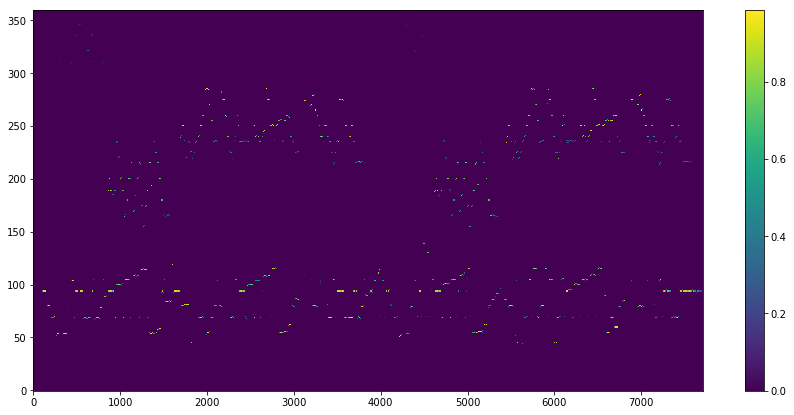

In [40]:
plt.figure(figsize=(15, 7))
plt.imshow(mask, origin='lower')
plt.axis('auto')
plt.colorbar()